
# Visualization of MLP weights on MNIST

Sometimes looking at the learned coefficients of a neural network can provide
insight into the learning behavior. For example if weights look unstructured,
maybe some were not used at all, or if very large coefficients exist, maybe
regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a
MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784
features in the dataset. Therefore the first layer weight matrix has the shape
(784, hidden_layer_sizes[0]).  We can therefore visualize a single column of
the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only
for a very short time. Training longer would result in weights with a much
smoother spatial appearance. The example will throw a warning because it
doesn't converge, in this case this is what we want because of resource
usage constraints on our Continuous Integration infrastructure that is used
to build this documentation on a regular basis.


In [1]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve

In [2]:
# Load data from https://www.openml.org/d/554
x, y = fetch_openml(name="Fashion-MNIST", as_frame=False, return_X_y=True)

In [3]:
# 改变数据类型
y = y.astype(int)
# 训练，测试数据分类
x_te, x_temp, y_te, y_temp = train_test_split(x, y, test_size=0.8, shuffle=True)
x_tr, x_va, y_tr, y_va = train_test_split(x_temp, y_temp, test_size=0.25, shuffle=True)

In [4]:
scaler = StandardScaler()
scaler.fit(x_tr)
trans_x_va = scaler.transform(x_va)
trans_x_tr = scaler.transform(x_tr)
trans_x_te = scaler.transform(x_te)

In [5]:
mlp = MLPClassifier(activation = "relu",learning_rate = "invscaling",hidden_layer_sizes = (400, 200,100,50))
mlp

MLPClassifier(hidden_layer_sizes=(400, 200, 100, 50),
              learning_rate='invscaling')

In [6]:
mlp.fit(trans_x_tr, y_tr)

MLPClassifier(hidden_layer_sizes=(400, 200, 100, 50),
              learning_rate='invscaling')

In [7]:
print("Training set score: %f" % mlp.score(trans_x_tr, y_tr))
print("Test set score: %f" % mlp.score(trans_x_te, y_te))

Training set score: 0.994476
Test set score: 0.892714


In [8]:
a = mlp.coefs_
for i in a:
    print(len(i))

784
400
200
100
50


In [9]:
print(mlp.coefs_[0].shape)

(784, 400)


In [10]:
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
print(vmin, vmax)

-0.8402088698600502 0.6231416782206588


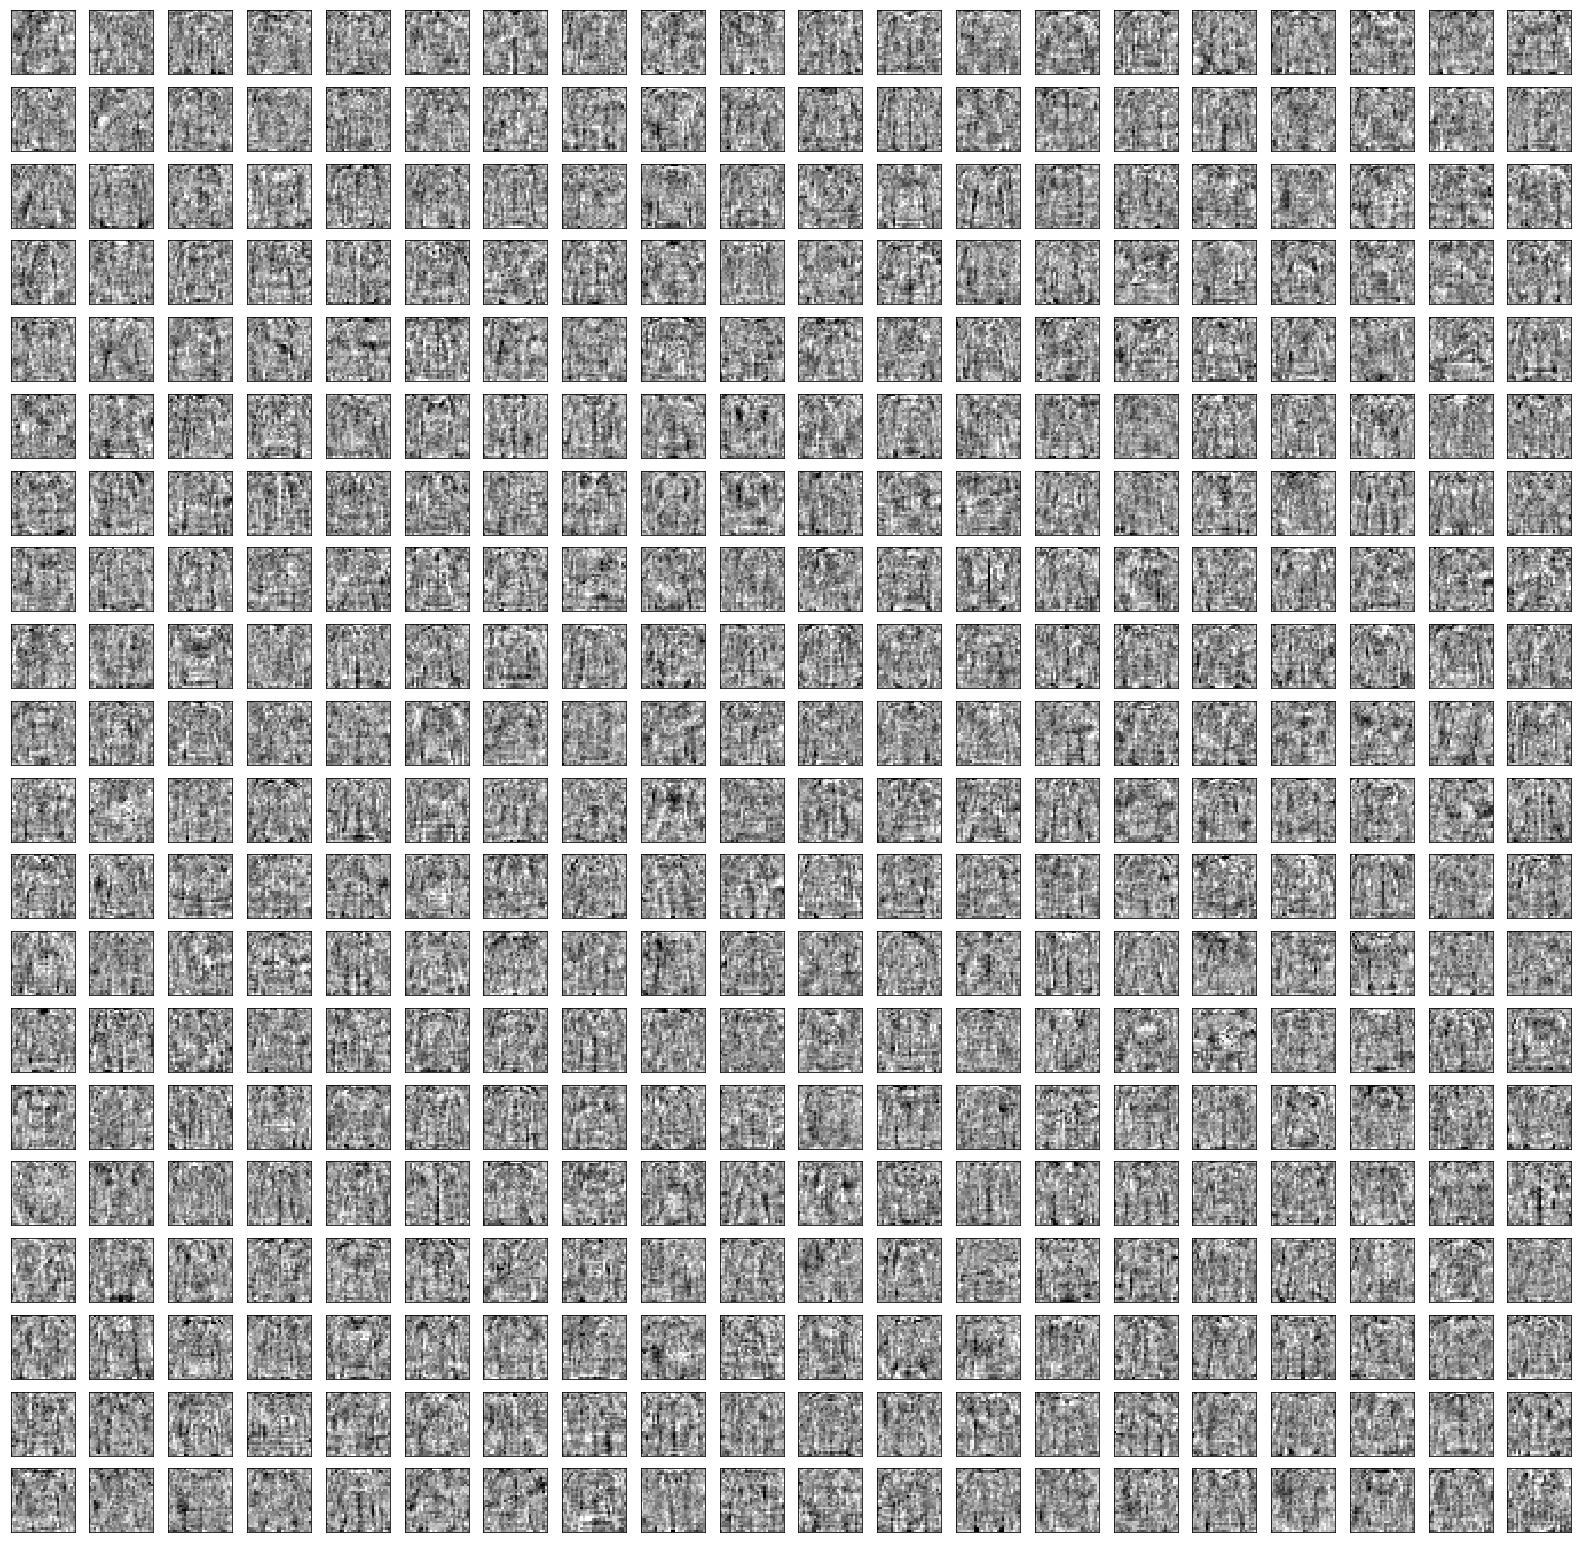

In [11]:
fig, axes = plt.subplots(20,20,figsize=(28,28))
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [12]:
vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[1].max()
print(vmin, vmax)

-0.7421033964948588 0.5451433743314078


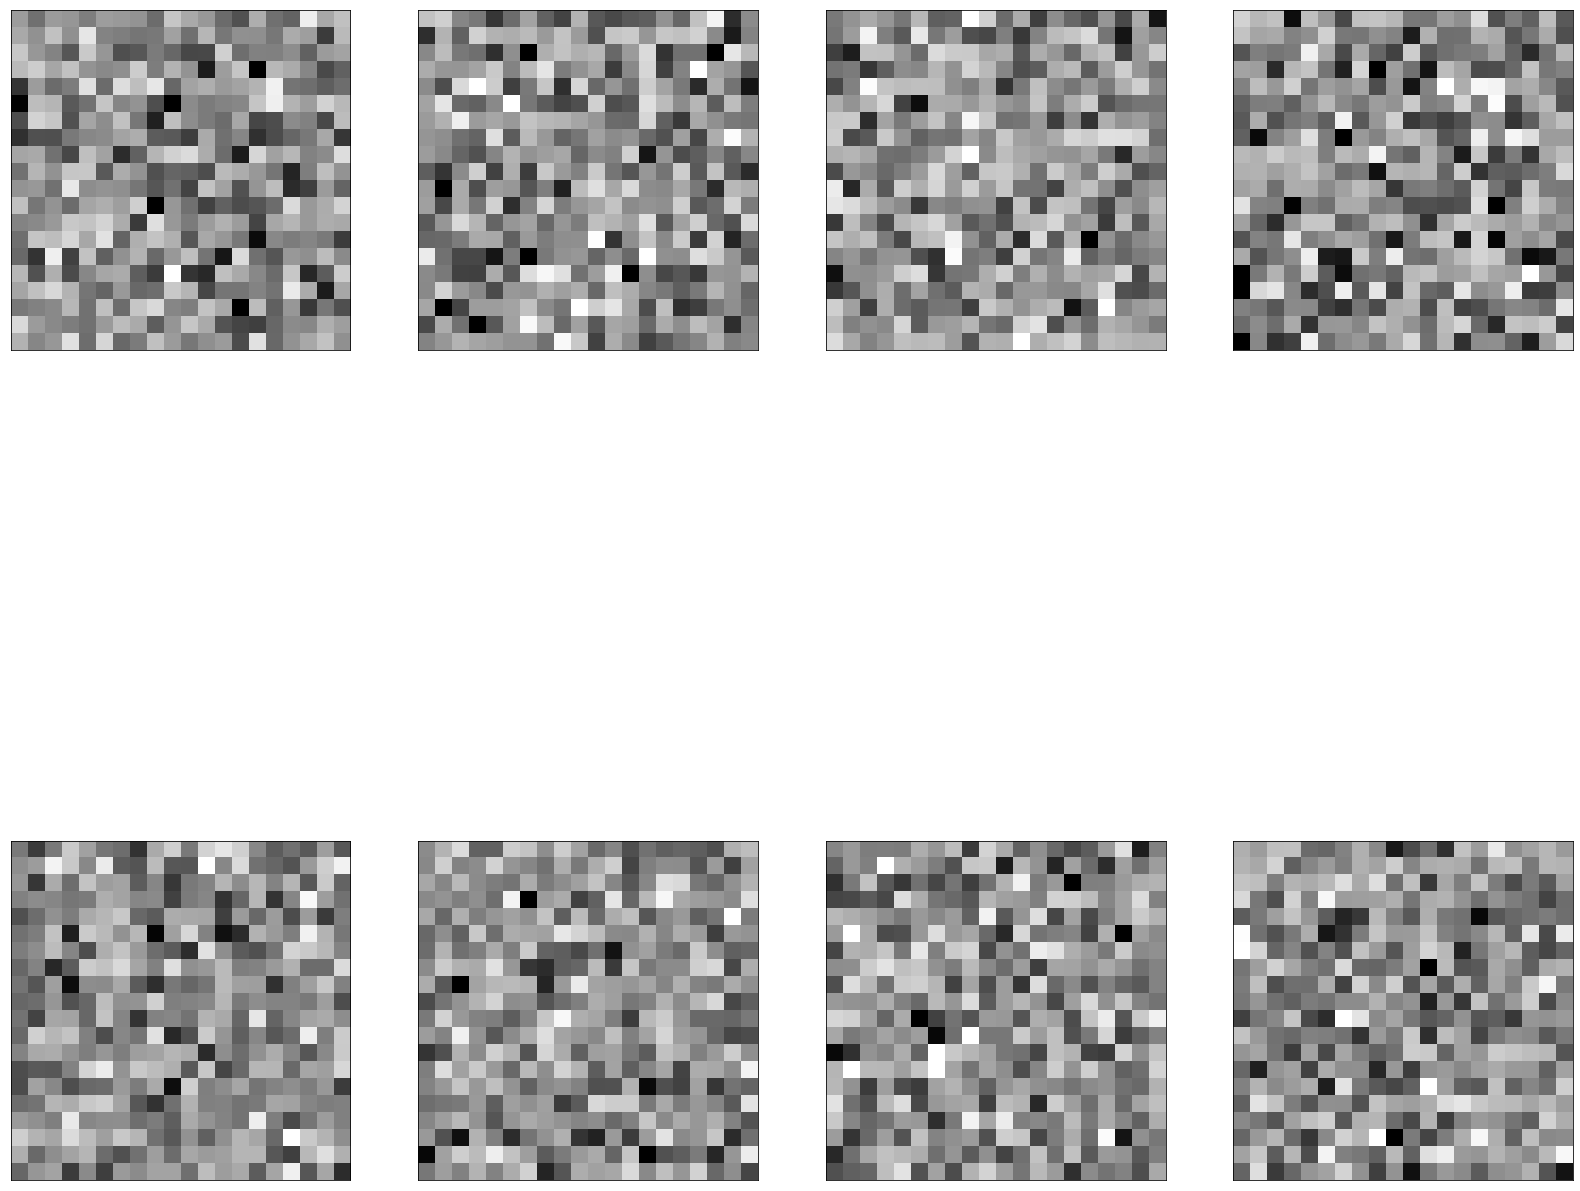

In [13]:
fig, axes = plt.subplots(2,4,figsize=(28,28))
for coef, ax in zip(mlp.coefs_[1].T, axes.ravel()):
    ax.matshow(coef.reshape(20, 20), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [14]:
vmin, vmax = mlp.coefs_[2].min(), mlp.coefs_[2].max()
print(vmin, vmax)

-0.5968372936271058 0.48085452022940095


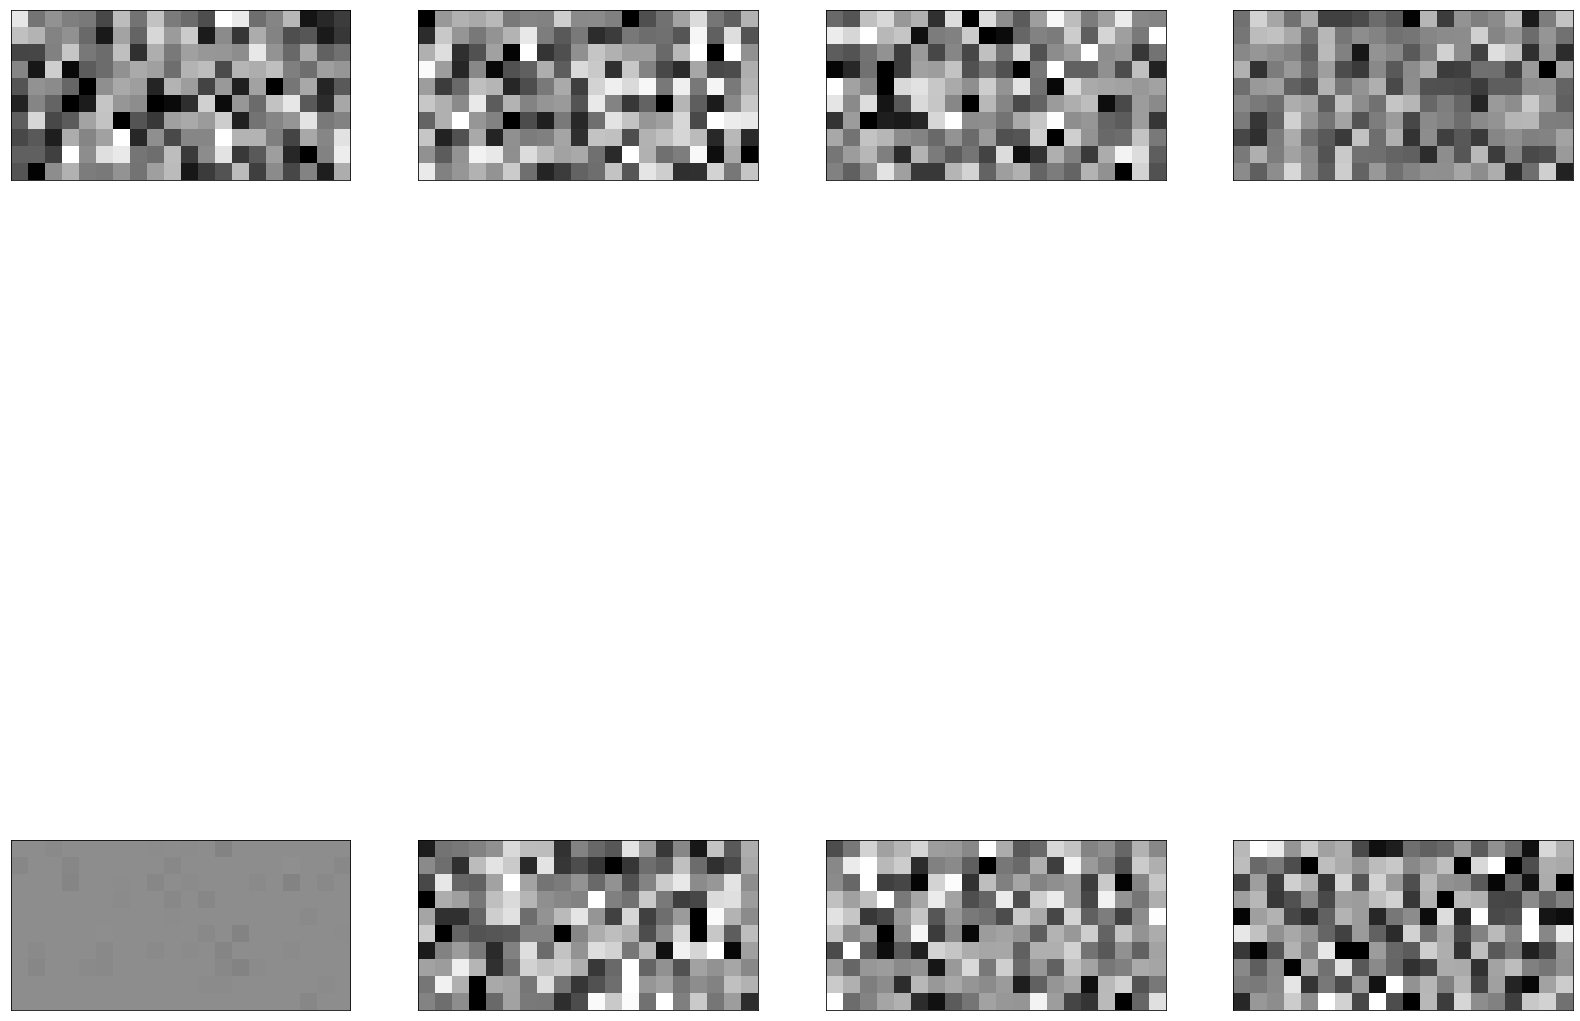

In [15]:
fig, axes = plt.subplots(2,4,figsize=(28,28))
for coef, ax in zip(mlp.coefs_[2].T, axes.ravel()):
    ax.matshow(coef.reshape(10, 20), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [16]:
vmin, vmax = mlp.coefs_[3].min(), mlp.coefs_[3].max()
print(vmin, vmax)

-0.5684194749321445 0.49848593691069104


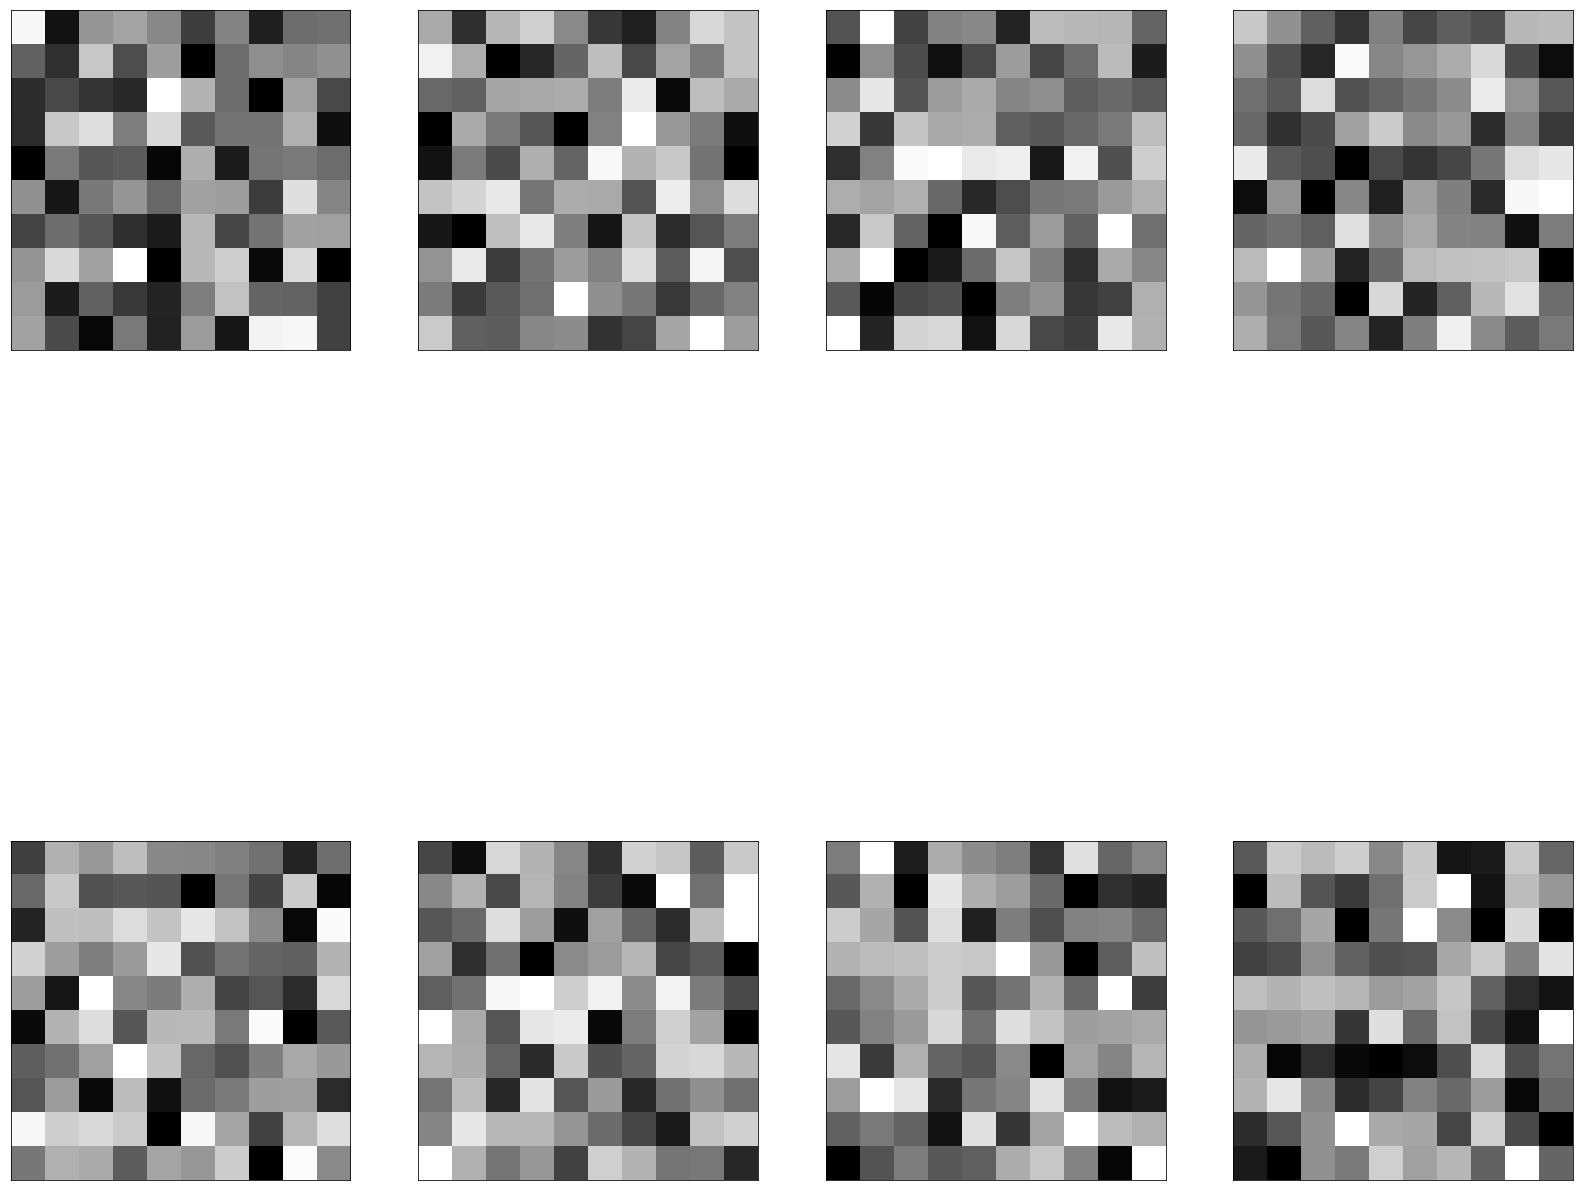

In [17]:
fig, axes = plt.subplots(2,4,figsize=(28,28))
for coef, ax in zip(mlp.coefs_[3].T, axes.ravel()):
    ax.matshow(coef.reshape(10, 10), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [18]:
vmin, vmax = mlp.coefs_[4].min(), mlp.coefs_[4].max()
print(vmin, vmax)

-0.5829202836615944 0.3710387128297346


In [19]:
fig, axes = plt.subplots(2,4,figsize=(28,28)
for coef, ax in zip(mlp.coefs_[4].T, axes.ravel()):
    ax.matshow(coef.reshape(5, 10), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

SyntaxError: Generator expression must be parenthesized (776855553.py, line 1)